In [19]:
from orgpackage.nliclassifier import *
%load_ext autoreload
%autoreload 2

import logging
from transformers import logging as hf_logging

# Suppress Hugging Face warnings
hf_logging.set_verbosity_error()
logging.getLogger("transformers.modeling_utils").setLevel(logging.ERROR)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
organizations = [
    "Oxford University", 
    "Massachusetts General Hospital", 
    "Berlin Institute of Technology", 
    "World Health Organization", 
    "Royal Institute of Technology", 
    "CERN", 
    "Louvre Museum", 
    "San Francisco General Hospital", 
    "MIT Media Lab", 
    "International Red Cross"
]

# Test set of labels
labels = ["university", "hospital", "research institution", "museum", "government agency", "other"]

# Models to be tested
models = [
    "joeddav/xlm-roberta-large-xnli",
    "MoritzLaurer/bge-m3-zeroshot-v2.0", 
    "MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7", 
    "MoritzLaurer/multilingual-MiniLMv2-L6-mnli-xnli", 
]

# Running tests for each model and configuration
classifiers = [pipeline("zero-shot-classification", model=model_name) for model_name in models]
for classifier in classifiers:
    print(llm_classify(
    classifier,
        "This organization is a {}",
    names=["Harvard University", "CERN", "World Health Organization"],
    labels=["hospital", "university", "museum", "other"],
    multi_label=True)
    )

Classifying organizations: 100%|██████████| 3/3 [00:00<00:00,  4.36organization/s]


{'hospital': {'classification': [0, 0, 0], 'confidence': [0.0010866104857996106, 0.0010244215372949839, 0.003918780479580164]}, 'university': {'classification': [1, 0, 0], 'confidence': [0.9982607960700989, 0.0021923210006207228, 0.0013325816253200173]}, 'museum': {'classification': [0, 0, 0], 'confidence': [0.007234446704387665, 0.005067127291113138, 0.004421651363372803]}}


Classifying organizations: 100%|██████████| 3/3 [00:00<00:00,  8.49organization/s]


{'hospital': {'classification': [0, 0, 0], 'confidence': [0.0002954372321255505, 0.0002919139224104583, 0.0005996041581965983]}, 'university': {'classification': [1, 0, 0], 'confidence': [0.7288563251495361, 0.0004084452521055937, 0.00032428090344183147]}, 'museum': {'classification': [0, 0, 0], 'confidence': [0.0004375343269202858, 0.000898251251783222, 0.0003316558722872287]}}


Classifying organizations: 100%|██████████| 3/3 [00:00<00:00,  8.06organization/s]


{'hospital': {'classification': [0, 0, 0], 'confidence': [0.005994392093271017, 0.0003432914090808481, 0.10811703652143478]}, 'university': {'classification': [1, 0, 0], 'confidence': [0.9997881650924683, 0.007420026231557131, 0.002284454647451639]}, 'museum': {'classification': [0, 0, 0], 'confidence': [0.23959898948669434, 0.3511601984500885, 0.019452258944511414]}}


Classifying organizations: 100%|██████████| 3/3 [00:00<00:00, 32.88organization/s]

{'hospital': {'classification': [0, 0, 0], 'confidence': [0.040765341371297836, 0.06041770055890083, 0.030451806262135506]}, 'university': {'classification': [1, 0, 0], 'confidence': [0.9837291836738586, 0.16149279475212097, 0.00485557597130537]}, 'museum': {'classification': [0, 0, 0], 'confidence': [0.07629949599504471, 0.1487853229045868, 0.0027590731624513865]}}


In [8]:
from transformers import AutoModel, AutoConfig
def get_num_params(model_name: str):
    model = AutoModel.from_pretrained(model_name)
    config = AutoConfig.from_pretrained(model_name)
    
    num_params = sum(p.numel() for p in model.parameters())
    
    # Print model details
    print(model_name)
    print(f"Model architecture: {config.architectures}")
    print(f"Number of parameters: {num_params}")
    print(f"Hidden size: {config.hidden_size}")
    print(f"Number of layers: {config.num_hidden_layers}")
    print(f"Model type: {config.model_type}")
    
    return num_params


joeddav/xlm-roberta-large-xnli
Model architecture: ['XLMRobertaForSequenceClassification']
Number of parameters: 559890432
Hidden size: 1024
Number of layers: 24
Model type: xlm-roberta


Some weights of XLMRobertaModel were not initialized from the model checkpoint at MoritzLaurer/bge-m3-zeroshot-v2.0 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


MoritzLaurer/bge-m3-zeroshot-v2.0
Model architecture: ['XLMRobertaForSequenceClassification']
Number of parameters: 567754752
Hidden size: 1024
Number of layers: 24
Model type: xlm-roberta
MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7
Model architecture: ['DebertaV2ForSequenceClassification']
Number of parameters: 278218752
Hidden size: 768
Number of layers: 12
Model type: deberta-v2


Some weights of XLMRobertaModel were not initialized from the model checkpoint at MoritzLaurer/multilingual-MiniLMv2-L6-mnli-xnli and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


MoritzLaurer/multilingual-MiniLMv2-L6-mnli-xnli
Model architecture: ['XLMRobertaForSequenceClassification']
Number of parameters: 106993920
Hidden size: 384
Number of layers: 6
Model type: xlm-roberta


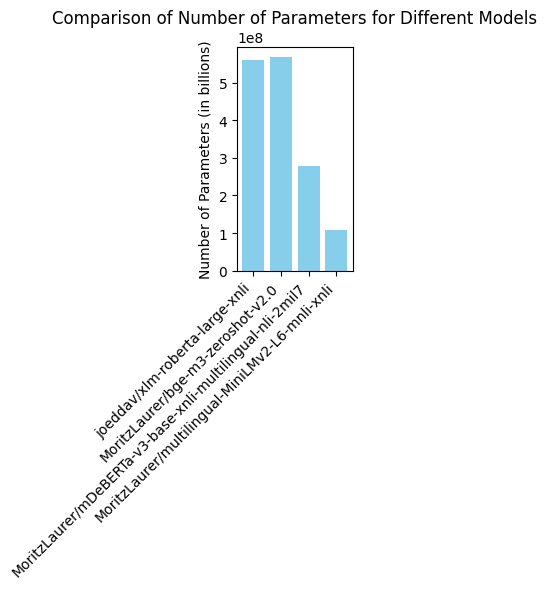

In [9]:
model_params = {model_name: get_num_params(model_name) for model_name in models}
import matplotlib.pyplot as plt
# Create a bar plot of the number of parameters for each model
plt.figure(figsize=(3,6))
plt.bar(model_params.keys(), model_params.values(), color='skyblue')
plt.ylabel('Number of Parameters (in billions)')
plt.title('Comparison of Number of Parameters for Different Models')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()